In [170]:
# import statements
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Function Definitions

In [179]:
# define model
## note: p_EI could be included but it's just 1.
def SEIHRD_model(y, t, beta, r_EI, p_EI, r_IR, p_IR, r_IH, p_IH, r_HR, p_HR, r_HD, p_HD, N):
    S, E, I, H, R, D = y
    dSdt = -S*I*beta(t)/N
    dEdt = S*I*beta(t)/N - E*r_EI(t)
    dIdt = E*r_EI(t) - I*r_IR(t)*p_IR(t) - I*r_IH(t)*p_IH(t)
    dHdt = I*r_IH(t)*p_IH(t) - H*r_HR(t)*p_HR(t) - H*r_HD(t)*p_HD(t)
    dRdt = I*r_IR(t)*p_IR(t) + H*r_HR(t)*p_HR(t)
    dDdt = H*r_HD(t)*p_HD(t)
    return dSdt, dEdt, dIdt, dHdt, dRdt, dDdt

#  plot model
def plotSEIHRD(t, S, E, I, H, R, D):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'r', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, E, 'o', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, H, 'g', alpha=0.7, linewidth=2, label='Hospitalized')
    ax.plot(t, R, 'b', alpha=0.7, linewidth=2, label='Recovered')
    ax.plot(t, D, 'p', alpha=0.7, linewidth=2, label='Dead')


    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Population')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    # ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    
    plt.show();

# Example Simulation and Plot

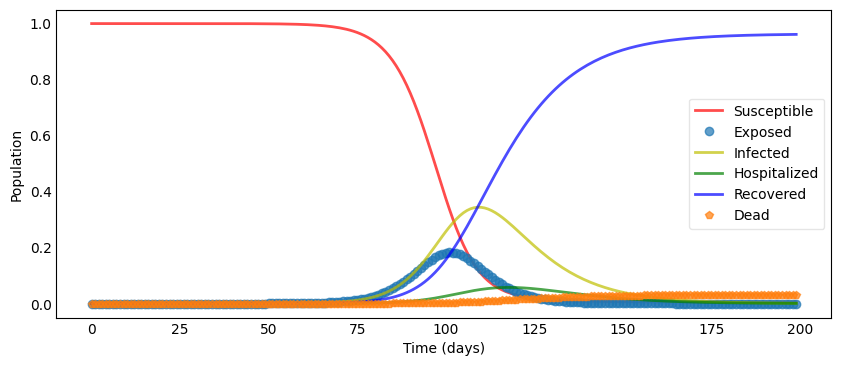

In [180]:
# set parameter values
def beta(t): return np.piecewise(t, [t>=0], [0.4])
def r_EI(t): return np.piecewise(t, [t>=0], [0.2])
def p_EI(t): return np.piecewise(t, [t>=0], [1]) ## not sure if this is necessary?? not in the model.
def r_IR(t): return np.piecewise(t, [t>=0], [0.07])
def p_IR(t): return np.piecewise(t, [t>=0], [0.8])
def r_IH(t): return np.piecewise(t, [t>=0], [0.1])
def p_IH(t): return np.piecewise(t, [t>=0], [0.2])
def r_HR(t): return np.piecewise(t, [t>=0], [0.1])
def p_HR(t): return np.piecewise(t, [t>=0], [0.88])
def r_HD(t): return np.piecewise(t, [t>=0], [0.1])
def p_HD(t): return np.piecewise(t, [t>=0], [0.12])
N = 19340000

# set initial conditions
N0 = N
I0 = 4 # fill in with data
D0 = 0 # fill in with data
H0 = 0 # fill in with data
E0 = I0/4 
R0 = 0 # fill in with data
S0 = N - E0 - I0 - R0 - H0 - D0
y0 = S0, E0, I0, H0, R0, D0 # Initial conditions vector

# set simulation parameters
## 
dt = 1
tstart = 0
tend = 200
tvect = np.arange(tstart, tend, dt) 

# solve odes
sim = odeint(SEIHRD_model, y0, tvect, args=(beta, r_EI, p_EI, r_IR, p_IR, r_IH, p_IH, r_HR, p_HR, r_HD, p_HD, N))
S, E, I, H, R, D = sim.T

# plot results
# plotSEIHRD(tvect, S, E, I, H, R, D) ## original
plotSEIHRD(tvect, S/N, E/N, I/N, H/N, R/N, D/N) ## fractions of population

In [173]:
print(max(S)/N)
print(max(E)/N)
print(max(I)/N)
print(max(H)/N)
print(max(R)/N)
print(max(D)/N)

0.9999997414684592
0.18256229124248446
0.3440850454678591
0.057736382021252995
0.9613896951965685
0.03127933526935587


In [138]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.DataFrame(list(zip(S/N, E/N, I/N, H/N, R/N, D/N)), columns =['S', 'E', 'I', 'H', 'R', 'D'])
df.head(10)

,S,E,I,H,R,D
0,1.000000,5.170631e-08,2.068252e-07,0.000000e+00,0.000000e+00,0.000000e+00
1,1.000000,1.171883e-07,2.082327e-07,3.929479e-09,1.173670e-08,2.394003e-11
2,1.000000,1.735488e-07,2.211558e-07,7.627481e-09,2.422097e-08,9.339210e-11
3,0.999999,2.261964e-07,2.435531e-07,1.131350e-08,3.802451e-08,2.069580e-10
4,0.999999,2.790240e-07,2.744145e-07,1.515787e-08,5.365232e-08,3.655531e-10
5,0.999999,3.349958e-07,3.134557e-07,1.930288e-08,7.158791e-08,5.719512e-10
6,0.999999,3.965400e-07,3.609264e-07,2.387730e-08,9.232636e-08,8.305403e-10
7,0.999999,4.658166e-07,4.174963e-07,2.900657e-08,1.164000e-07,1.147225e-09
8,0.999999,5.449047e-07,4.841914e-07,3.482046e-08,1.444000e-07,1.529435e-09
9,0.999999,6.359405e-07,5.623667e-07,4.145912e-08,1.769961e-07,1.986213e-09


# SEIHRD Standard Model with Normalized Compartments

In [189]:
# define model
## note: p_EI could be included but it's just 1.
def SEIHRD_norm_model(y, t, beta, r_EI, p_EI, r_IR, p_IR, r_IH, p_IH, r_HR, p_HR, r_HD, p_HD, N):
    S, E, I, H, R, D = y
    dSdt = -S*I*beta(t)
    dEdt = S*I*beta(t) - E*r_EI(t)
    dIdt = E*r_EI(t) - I*r_IR(t)*p_IR(t) - I*r_IH(t)*p_IH(t)
    dHdt = I*r_IH(t)*p_IH(t) - H*r_HR(t)*p_HR(t) - H*r_HD(t)*p_HD(t)
    dRdt = I*r_IR(t)*p_IR(t) + H*r_HR(t)*p_HR(t)
    dDdt = H*r_HD(t)*p_HD(t)
    return dSdt, dEdt, dIdt, dHdt, dRdt, dDdt

#  plot model
def plotSEIHRD_norm(t, S, E, I, H, R, D):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'r', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, E, 'o', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, H, 'g', alpha=0.7, linewidth=2, label='Hospitalized')
    ax.plot(t, R, 'b', alpha=0.7, linewidth=2, label='Recovered')
    ax.plot(t, D, 'p', alpha=0.7, linewidth=2, label='Dead')


    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Population')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    # ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    
    plt.show();

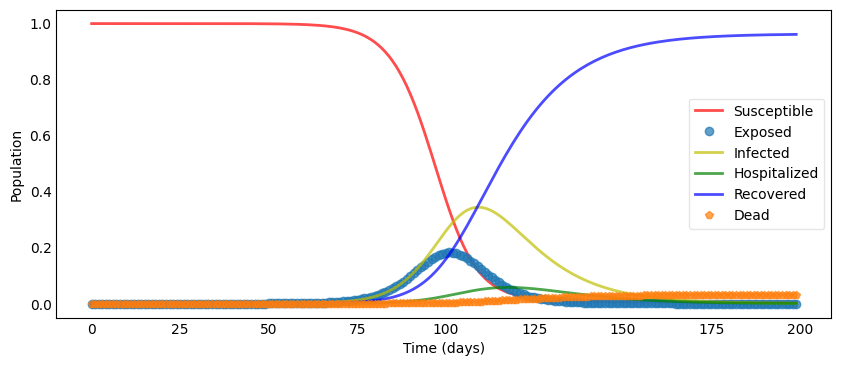

In [190]:
# set parameter values
def beta(t): return np.piecewise(t, [t>=0], [0.4])
def r_EI(t): return np.piecewise(t, [t>=0], [0.2])
def p_EI(t): return np.piecewise(t, [t>=0], [1]) ## not sure if this is necessary?? not in the model.
def r_IR(t): return np.piecewise(t, [t>=0], [0.07])
def p_IR(t): return np.piecewise(t, [t>=0], [0.8])
def r_IH(t): return np.piecewise(t, [t>=0], [0.1])
def p_IH(t): return np.piecewise(t, [t>=0], [0.2])
def r_HR(t): return np.piecewise(t, [t>=0], [0.1])
def p_HR(t): return np.piecewise(t, [t>=0], [0.88])
def r_HD(t): return np.piecewise(t, [t>=0], [0.1])
def p_HD(t): return np.piecewise(t, [t>=0], [0.12])
N = 19340000

# set initial conditions
N0 = N
I0 = 4 # fill in with data
D0 = 0 # fill in with data
H0 = 0 # fill in with data
E0 = I0/4 
R0 = 0 # fill in with data
S0 = N - E0 - I0 - R0 - H0 - D0
y0 = S0/N, E0/N, I0/N, H0/N, R0/N, D0/N # Initial conditions vector

# set simulation parameters
## 
dt = 1
tstart = 0
tend = 200
tvect = np.arange(tstart, tend, dt) 

# solve odes
sim = odeint(SEIHRD_norm_model, y0, tvect, args=(beta, r_EI, p_EI, r_IR, p_IR, r_IH, p_IH, r_HR, p_HR, r_HD, p_HD, N))
S, E, I, H, R, D = sim.T

# plot results
plotSEIHRD_norm(tvect, S, E, I, H, R, D) ## fractions of population

In [185]:
print(S)

[0.99999974 0.99999974 0.99999974 ... 0.99999974 0.99999974 0.99999974]


## Change beta to be beta*(1-c_m*epsilon_m)

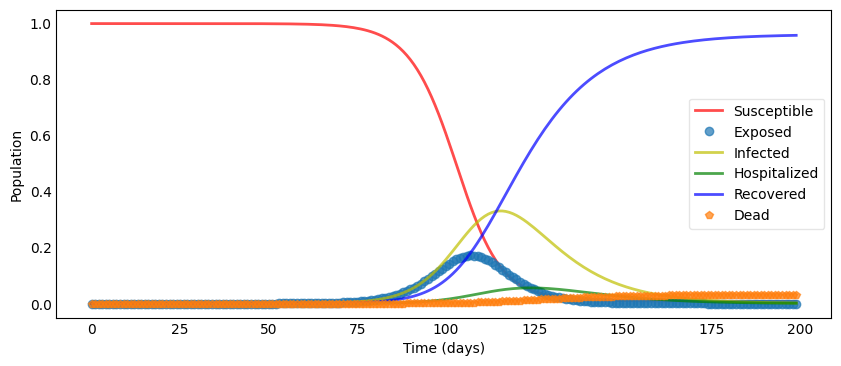

In [139]:
# set parameter values
def epsilon_m(t): return np.piecewise(t, [t>=0], [0.25]) ## placeholder values for epsilon_m and c_m.  Will run with c_m=0.4, 0.6, 0.8
def c_m(t): return np.piecewise(t, [t>=0], [0.25]) ## placeholder values for epsilon_m and c_m.  Will run with c_m=0.4, 0.6, 0.8
def beta(t): return np.piecewise(t, [t>=0], [0.4*(1-epsilon_m(t)*c_m(t))]) ## placeholder values for epsilon_m and c_m.  Will run with c_m=0.4, 0.6, 0.8
def r_EI(t): return np.piecewise(t, [t>=0], [0.2])
def p_EI(t): return np.piecewise(t, [t>=0], [1]) ## not sure if this is necessary?? not in the model.
def r_IR(t): return np.piecewise(t, [t>=0], [0.07])
def p_IR(t): return np.piecewise(t, [t>=0], [0.8])
def r_IH(t): return np.piecewise(t, [t>=0], [0.1])
def p_IH(t): return np.piecewise(t, [t>=0], [0.2])
def r_HR(t): return np.piecewise(t, [t>=0], [0.1])
def p_HR(t): return np.piecewise(t, [t>=0], [0.88])
def r_HD(t): return np.piecewise(t, [t>=0], [0.1])
def p_HD(t): return np.piecewise(t, [t>=0], [0.12])
N = 19340000


# set initial conditions
N0 = N
I0 = 4 # fill in with data
D0 = 0 # fill in with data
R0 = 0 # fill in with data
H0 = I0/10 # fill in with data
E0 = I0/4 
S0 = N - E0 - I0 - R0 - H0 - D0
y0 = S0, E0, I0, H0, R0, D0 # Initial conditions vector

# set simulation parameters
## 
dt = 1
tstart = 0
tend = 200
tvect = np.arange(tstart, tend, dt) 

# solve odes
sim = odeint(SEIHRD_model, y0, tvect, args=(beta, r_EI, p_EI, r_IR, p_IR, r_IH, p_IH, r_HR, p_HR, r_HD, p_HD, N))
S, E, I, H, R, D = sim.T

# plot results
# plotSEIHRD(tvect, S, E, I, H, R, D) ## original
plotSEIHRD(tvect, S/N, E/N, I/N, H/N, R/N, D/N) ## fractions of pop.

In [140]:
df = pd.DataFrame(list(zip(S/N, E/N, I/N, H/N, R/N, D/N)), columns =['S', 'E', 'I', 'H', 'R', 'D'])
df.head(30)

,S,E,I,H,R,D
0,1.000000,5.170631e-08,2.068252e-07,2.068252e-08,0.000000e+00,0.000000e+00
1,1.000000,1.124524e-07,2.077592e-07,2.264066e-08,1.345963e-08,2.601147e-10
2,1.000000,1.644532e-07,2.193789e-07,2.453766e-08,2.745069e-08,5.431410e-10
3,0.999999,2.125487e-07,2.397174e-07,2.656191e-08,4.251465e-08,8.495335e-10
4,0.999999,2.602067e-07,2.677399e-07,2.885603e-08,5.912491e-08,1.181710e-09
5,0.999999,3.100358e-07,3.030648e-07,3.153601e-08,7.772753e-08,1.543623e-09
6,0.999999,3.641291e-07,3.457862e-07,3.470437e-08,9.877068e-08,1.940528e-09
7,0.999999,4.242990e-07,3.963636e-07,3.845934e-08,1.227272e-07,2.378874e-09
8,0.999999,4.922399e-07,4.555585e-07,4.290153e-08,1.501131e-07,2.866300e-09
9,0.999999,5.696456e-07,5.244012e-07,4.813913e-08,1.815037e-07,3.411691e-09


In [141]:
print(max(S))
print(max(E))
print(max(I))
print(max(H))
print(max(R))
print(max(D))

19339994.6
3325878.373173154
6396672.150177323
1084489.1684596052
18528494.029624797
601999.1525129337


### Time-varying beta 

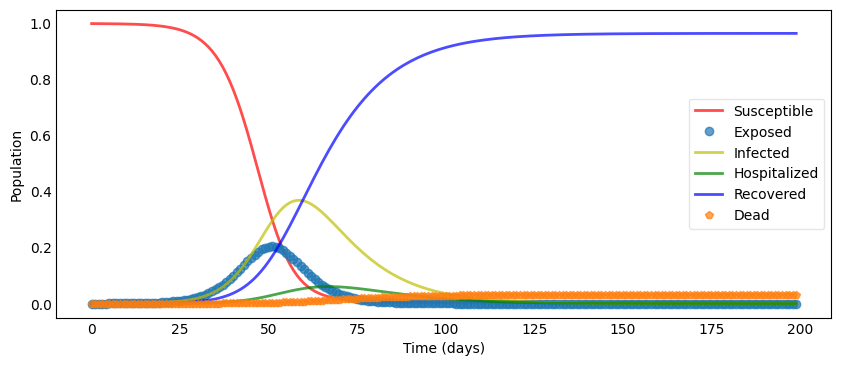

In [168]:

# set parameter values : t0=18
def beta_c(t): return np.piecewise(t, [t>=0], [0.4])
def beta_s(t): return np.piecewise(t, [t>=0], [1.0])
def k(t): return np.piecewise(t, [t>=0], [5.0])
def kappa(t): return np.piecewise(t, [t>=0], [0.45454545454545453])
def t0(t): return np.piecewise(t, [t>=0], [86.25])
def m(t): return beta_c(t) + (beta_s(t) - beta_c(t))/(1+np.exp(-k(t)*(t0(t)-t)))
# def m(t): return np.piecewise(t, [t>=0], [0.1])
def beta(t): return np.piecewise(t, [t>=0], [kappa(t)*m(t)])
def r_EI(t): return np.piecewise(t, [t>=0], [0.2])
def p_EI(t): return np.piecewise(t, [t>=0], [1]) ## not sure if this is necessary?? not in the model.
def r_IR(t): return np.piecewise(t, [t>=0], [0.07])
def p_IR(t): return np.piecewise(t, [t>=0], [0.8])
def r_IH(t): return np.piecewise(t, [t>=0], [0.1])
def p_IH(t): return np.piecewise(t, [t>=0], [0.2])
def r_HR(t): return np.piecewise(t, [t>=0], [0.1])
def p_HR(t): return np.piecewise(t, [t>=0], [0.88])
def r_HD(t): return np.piecewise(t, [t>=0], [0.1])
def p_HD(t): return np.piecewise(t, [t>=0], [0.12])
N = 19340000


# set initial conditions
N0 = N
I0 = 4000 # fill in with data
D0 = 0 # fill in with data
R0 = 0 # fill in with data
H0 = 0 # fill in with data
E0 = 1
S0 = N - I0 - E0
y0 = S0, E0, I0, H0, R0, D0 # Initial conditions vector

# set simulation parameters
## 
dt = 1
tstart = 0
tend = 200
tvect = np.arange(tstart, tend, dt) 

# solve odes
sim = odeint(SEIHRD_model, y0, tvect, args=(beta, r_EI, p_EI, r_IR, p_IR, r_IH, p_IH, r_HR, p_HR, r_HD, p_HD, N))
S, E, I, H, R, D = sim.T

# plot results
plotSEIHRD(tvect, S/N, E/N, I/N, H/N, R/N, D/N)

In [169]:
print(I>1000000)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [107]:
# df = pd.DataFrame(list(zip(S, E, I, H, R, D)), columns =['S', 'E', 'I', 'H', 'R', 'D'])
# print(max(S))
# print(max(E))
# print(max(I))
# print(max(H))
# print(max(R))
# print(max(D))
# print('')
# print(np.argmax(S))
# print(np.argmax(E))
# print(np.argmax(I))
# print(np.argmax(H))
# print(np.argmax(R))
# print(np.argmax(D))


In [100]:
df_normalized = pd.DataFrame(list(zip(S/N, E/N, I/N, H/N, R/N, D/N)), columns =['S/N', 'E/N', 'I/N', 'H/N', 'R/N', 'D/N'])
print(max(S)/N)
print(max(E)/N)
print(max(I)/N)
print(max(H)/N)
print(max(R)/N)
print(max(D)/N)
print('')
print(np.argmax(S))
print(np.argmax(E))
print(np.argmax(I))
print(np.argmax(H))
print(np.argmax(R))
print(np.argmax(D))

0.9999997207859359
0.14564902897171028
0.294895330015279
0.05128240201712886
0.9422228124827823
0.030399602604190792

0
121
130
138
199
199


### (3) : Adding compartments and transitions to represent masking/non-masking populations

In [191]:
def SEIHRD_compliance_model(y, t, beta, r_EI, p_EI, r_IR, p_IR, r_IH, p_IH, r_HR, p_HR, r_HD, p_HD, N, c_m_0, eps_m_0, c_m_1, eps_m_1, c_m_2, eps_m_2, c_m_3, eps_m_3, p_NCC, p_CNC):
    Sc, Sn, Ec, En, Ic, In, H, R, D = y
    dScdt = (-Ic*Sc*beta(t)*(-c_m_0(t)*eps_m_0(t) + 1))/N(t) - In*Sc*beta(t)*(-c_m_1(t)*eps_m_1(t) + 1)/N(t) + Sn*p_NCC(t) - Sn*p_NCC(t)
    dSndt = (-In*Sn*beta(t)*(-c_m_2(t)*eps_m_2(t) + 1))/N(t) - Ic*Sn*beta(t)*(-c_m_3(t)*eps_m_3(t) + 1)/N(t) - Sn*p_NCC(t) + Sn*p_NCC(t)
    dEcdt = (Ic*Sc*beta(t)*(-c_m_0(t)*eps_m_0(t) + 1))/N(t) + In*Sc*beta(t)*(-c_m_1(t)*eps_m_1(t) + 1)/N(t) - Ec*r_EI(t) + En*p_NCC(t) - Ec*p_CNC(t)
    dEndt = (In*Sn*beta(t)*(-c_m_2(t)*eps_m_2(t) + 1))/N(t) + Ic*Sn*beta(t)*(-c_m_3(t)*eps_m_3(t) + 1)/N(t) - En*r_EI(t) - En*p_NCC(t) + Ec*p_CNC(t)
    dIcdt = Ec*r_EI(t) - Ic*p_IR(t)*r_IR(t) - Ic*p_IH(t)*r_IH(t) + In*p_NCC(t) - Ic*p_CNC(t)
    dIndt = En*r_EI(t) - In*p_IR(t)*r_IR(t) - In*p_IH(t)*r_IH(t) - In*p_NCC(t) + Ic*p_CNC(t)
    dHdt = Ic*p_IH(t)*r_IH(t) + In*p_IH(t)*r_IH(t) - H*p_HR(t)*r_HR(t) - H*p_HD(t)*r_HD(t)
    dRdt = Ic*p_IR(t)*r_IR(t) + In*p_IR(t)*r_IR(t) + H*p_HR(t)*r_HR(t)
    dDdt = H*r_HD(t)*p_HD(t) + H*p_HD(t)*r_HD(t)
    return dScdt, dSndt, dEcdt, dEndt, dIcdt, dIndt, dHdt, dRdt, dDdt

#  plot model
def plotSEIHRD_compliance(t, Sc, Sn, Ec, En, Ic, In, H, R, D):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    # ax.plot(t, Sc, 'r+', alpha=0.7, linewidth=2, label='Susceptible compliant')
    # ax.plot(t, Sn, 'r', alpha=0.7, linewidth=2, label='Susceptible noncompliant')
    # ax.plot(t, Ec, 'orange', alpha=0.7, linewidth=2, label='Exposed compliant')
    # ax.plot(t, En, 'orange', alpha=0.7, linewidth=2,linestyle='--', label='Exposed noncompliant')
    ax.plot(t, Ic, 'y+', alpha=0.7, linewidth=2, label='Infected compliant')
    ax.plot(t, In, 'y', alpha=0.7, linewidth=2, label='Infected noncompliant')
    # ax.plot(t, H, 'g', alpha=0.7, linewidth=2, label='Hospitalized')
    # ax.plot(t, R, 'b', alpha=0.7, linewidth=2, label='Recovered')
    # ax.plot(t, D, 'p', alpha=0.7, linewidth=2, label='Dead')

    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Population')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    
    plt.show();

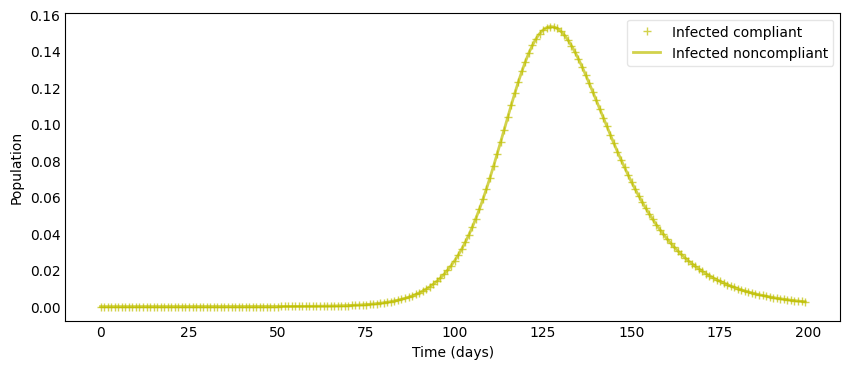

In [211]:
# set parameter values
def beta(t): return np.piecewise(t, [t>=0], [0.4])
def r_EI(t): return np.piecewise(t, [t>=0], [0.2])
def p_EI(t): return np.piecewise(t, [t>=0], [1]) ## not sure if this is necessary?? not in the model.
def r_IR(t): return np.piecewise(t, [t>=0], [0.07])
def p_IR(t): return np.piecewise(t, [t>=0], [0.8])
def r_IH(t): return np.piecewise(t, [t>=0], [0.1])
def p_IH(t): return np.piecewise(t, [t>=0], [0.2])
def r_HR(t): return np.piecewise(t, [t>=0], [0.1])
def p_HR(t): return np.piecewise(t, [t>=0], [0.88])
def r_HD(t): return np.piecewise(t, [t>=0], [0.1])
def p_HD(t): return np.piecewise(t, [t>=0], [0.12])
def p_NCC(t): return np.piecewise(t, [t>=0], [0.1])
def p_CNC(t): return np.piecewise(t, [t>=0], [0.1])
def c_m_0(t): return np.piecewise(t, [t>=0], [0.4])
def c_m_1(t): return np.piecewise(t, [t>=0], [0.4])
def c_m_2(t): return np.piecewise(t, [t>=0], [0.4])
def c_m_3(t): return np.piecewise(t, [t>=0], [0.4])
def eps_m_0(t): return np.piecewise(t, [t>=0], [0.4])
def eps_m_1(t): return np.piecewise(t, [t>=0], [0.4])
def eps_m_2(t): return np.piecewise(t, [t>=0], [0.4])
def eps_m_3(t): return np.piecewise(t, [t>=0], [0.4])
def N(t): return 19340000


# set initial conditions

Ic0 = 2 # fill in with data
In0 = 2 # fill in with data
D0 = 0 # fill in with data
R0 = 0 # fill in with data
H0 = 0 # fill in with data
Ec0 = 0.5 
En0 = 0.5 
Sc0 = 9669997.50000000
Sn0 = 9669997.50000000
y0 = Sc0, Sn0, Ec0, En0, Ic0, In0, H0, R0, D0 # Initial conditions vector
N0 = Sc0 + Sn0 + Ec0 + En0 + Ic0 + In0 + H0 + R0 + D0

# set simulation parameters
## 
dt = 1
tstart = 0
tend = 200
tvect = np.arange(tstart, tend, dt) 

# solve odes
sim = odeint(SEIHRD_compliance_model, y0, tvect, args=(beta, r_EI, p_EI, r_IR, p_IR, r_IH, p_IH, r_HR, p_HR, r_HD, p_HD, N, c_m_0, eps_m_0, c_m_1, eps_m_1, c_m_2, eps_m_2, c_m_3, eps_m_3, p_NCC, p_CNC))
Sc, Sn, Ec, En, Ic, In, H, R, D = sim.T

# plot results
plotSEIHRD_compliance(tvect, Sc/N0, Sn/N0, Ec/N0, En/N0, Ic/N0, In/N0, H/N0, R/N0, D/N0)

In [214]:
print(np.argmax(Ic))
print(np.argmax(In))
print(max(Ic/N0))

# print('Sc', Sc[75])
# print('Sn', Sn[75])
# print('Ec', Ec[75])
# print('En', En[75])
# print('Ic', Ic[75])
# print('In', In[75])
# print('H', H[75])
# print('R', R[75])
# print('D', D[75])

127
127
0.1536153683320422


In [213]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.DataFrame(list(zip(Sc, Sn, Ec, En, Ic, In, H, R, D)), columns =['Sc', 'Sn', 'Ec', 'En', 'Ic', 'In', 'H', 'R', 'D'])
df.head(10)

,Sc,Sn,Ec,En,Ic,In,H,R,D
0,9.669998e+06,9.669998e+06,0.500000,0.500000,2.000000,2.000000,0.000000,0.000000,0.000000
1,9.669997e+06,9.669997e+06,1.016122,1.016122,2.001896,2.001896,0.075841,0.226538,0.000925
2,9.669996e+06,9.669996e+06,1.454136,1.454136,2.094697,2.094697,0.146366,0.464998,0.003598
3,9.669995e+06,9.669995e+06,1.852870,1.852870,2.260713,2.260713,0.215172,0.724185,0.007937
4,9.669995e+06,9.669995e+06,2.239996,2.239996,2.489863,2.489863,0.284994,1.011649,0.013935
5,9.669994e+06,9.669994e+06,2.635981,2.635981,2.777377,2.777377,0.358032,1.334342,0.021643
6,9.669993e+06,9.669993e+06,3.056760,3.056760,3.122301,3.122301,0.436172,1.699085,0.031161
7,9.669992e+06,9.669992e+06,3.515558,3.515558,3.526529,3.526529,0.521143,2.112916,0.042634
8,9.669990e+06,9.669990e+06,4.024142,4.024142,3.994206,3.994206,0.614627,2.583365,0.056244
9,9.669989e+06,9.669989e+06,4.593716,4.593716,4.531373,4.531373,0.718339,3.118684,0.072217


In [71]:
print(max(Sc), np.argmax(Sc))
print(max(Sn), np.argmax(Sn))
print(max(Ec), np.argmax(Ec))
print(max(En), np.argmax(En))
print(max(Ic), np.argmax(Ic))
print(max(In), np.argmax(In))
print(max(R), np.argmax(R))
print(max(H), np.argmax(H))
print(max(D), np.argmax(D))

9669958.8 0
9669958.8 0
1062738.8909598896 119
1164429.829984014 116
2362421.523206341 128
2364128.368395099 126
17436788.49129796 199
844377.3754074222 136
1123459.0729443058 199


In [73]:
# Timepoints of interest: t = 75 and later?

print(Sc[75])
print(Sn[75])
print(Ec[75])
print(En[75])
print(Ic[75])
print(In[75])
print(R[75])
print(H[75])
print(D[75])

9552370.528999059
9460914.465310046
46220.665341988555
64837.06834290299
57239.463147383154
67117.00811089612
77646.47900155936
12239.889995725722
2828.86350088222


In [ ]:
#### EXPERIMENTS CHANGING PROBABILITY OF CHANGING FROM COMPLIANT TO NONCOMPLIANT
#### Situation 1: 100% probability that compliant become noncompliant, 0% that noncompliant become compliant.
#### Results in 
# ### Parameter settings
# # set parameter values
# def beta(t): return np.piecewise(t, [t>=0], [0.4])
# def r_EI(t): return np.piecewise(t, [t>=0], [0.2])
# def p_EI(t): return np.piecewise(t, [t>=0], [1]) ## not sure if this is necessary?? not in the model.
# def r_IR(t): return np.piecewise(t, [t>=0], [0.07])
# def p_IR(t): return np.piecewise(t, [t>=0], [0.8])
# def r_IH(t): return np.piecewise(t, [t>=0], [0.1])
# def p_IH(t): return np.piecewise(t, [t>=0], [0.2])
# def r_HR(t): return np.piecewise(t, [t>=0], [0.1])
# def p_HR(t): return np.piecewise(t, [t>=0], [0.88])
# def r_HD(t): return np.piecewise(t, [t>=0], [0.1])
# def p_HD(t): return np.piecewise(t, [t>=0], [0.12])
# def p_NCC(t): return np.piecewise(t, [t>=0], [0])
# def p_CNC(t): return np.piecewise(t, [t>=0], [1])
# def c_m_0(t): return np.piecewise(t, [t>=0], [0.8])
# def c_m_1(t): return np.piecewise(t, [t>=0], [0.5])
# def c_m_2(t): return np.piecewise(t, [t>=0], [0.2])
# def c_m_3(t): return np.piecewise(t, [t>=0], [0.5])
# def eps_m_0(t): return np.piecewise(t, [t>=0], [0.8])
# def eps_m_1(t): return np.piecewise(t, [t>=0], [0.5])
# def eps_m_2(t): return np.piecewise(t, [t>=0], [0.2])
# def eps_m_3(t): return np.piecewise(t, [t>=0], [0.5])
# def N(t): return 19340000


# # set initial conditions
# N0 = 19340000
# Ic0 = 40 # fill in with data
# In0 = 40 # fill in with data
# D0 = 0 # fill in with data
# R0 = 0 # fill in with data
# H0 = I0/10 # fill in with data
# Ec0 = I0/4 
# En0 = I0/4 
# Sc0 = (1/2)*(N0 - Ec0 - En0 - Ic0 - In0 - R0 - H0 - D0)
# Sn0 = (1/2)*(N0 - Ec0 - En0 - Ic0 - In0 - R0 - H0 - D0)
# y0 = Sc0, Sn0, Ec0, En0, Ic0, In0, H0, R0, D0 # Initial conditions vector

# # set simulation parameters
# ## 
# dt = 1
# tstart = 0
# tend = 200
# tvect = np.arange(tstart, tend, dt) 

##### Outputs

# print(max(Sc), np.argmax(Sc))
# print(max(Sn), np.argmax(Sn))
# print(max(Ec), np.argmax(Ec))
# print(max(En), np.argmax(En))
# print(max(Ic), np.argmax(Ic))
# print(max(In), np.argmax(In))
# print(max(R), np.argmax(R))
# print(max(H), np.argmax(H))
# print(max(D), np.argmax(D))


# 9669958.8 0
# 9669958.8 0
# 261307.90792619984 93
# 2739554.683518397 96
# 48387.211153563214 94
# 5917749.537528712 104
# 18437888.38969805 199
# 1024523.6858155928 113
# 1200155.681272288 199

#### Situation 2: similar to the above but just changing p_CNC = 0.5 to model gradual (only among some people) noncompliance.
### Doesn't really improve # deaths/hospitalizations.

# 9669958.8 0
# 9669958.8 0
# 440364.82628066425 95
# 2531739.0202660863 97
# 150910.85437875523 97
# 5799157.93655431 106
# 18428231.543890238 199
# 1019484.7310399587 114
# 1199317.1131239198 199

#### Situation 3: similar to situation 2, just changing p_CNC = 0.25.  No marked improvement in D or H here either.

# 9669958.8 0
# 9669958.8 0
# 660421.9500760349 98
# 2245161.44234157 99
# 391887.34933018626 101
# 5498776.571790292 108
# 18403928.705365308 199
# 1007910.6887239281 116
# 1197279.3550659115 199

In [ ]:
### EXPERIMENTS CHANGING c_m and epsilon_m parameters 

# Situation 1 - setting 0's to 0.9 and 2's to 0.1

# # set parameter values
# def beta(t): return np.piecewise(t, [t>=0], [0.4])
# def r_EI(t): return np.piecewise(t, [t>=0], [0.2])
# def p_EI(t): return np.piecewise(t, [t>=0], [1]) ## not sure if this is necessary?? not in the model.
# def r_IR(t): return np.piecewise(t, [t>=0], [0.07])
# def p_IR(t): return np.piecewise(t, [t>=0], [0.8])
# def r_IH(t): return np.piecewise(t, [t>=0], [0.1])
# def p_IH(t): return np.piecewise(t, [t>=0], [0.2])
# def r_HR(t): return np.piecewise(t, [t>=0], [0.1])
# def p_HR(t): return np.piecewise(t, [t>=0], [0.88])
# def r_HD(t): return np.piecewise(t, [t>=0], [0.1])
# def p_HD(t): return np.piecewise(t, [t>=0], [0.12])
# def p_NCC(t): return np.piecewise(t, [t>=0], [0.1])
# def p_CNC(t): return np.piecewise(t, [t>=0], [0.1])
# def c_m_0(t): return np.piecewise(t, [t>=0], [0.9])
# def c_m_1(t): return np.piecewise(t, [t>=0], [0.5])
# def c_m_2(t): return np.piecewise(t, [t>=0], [0.1])
# def c_m_3(t): return np.piecewise(t, [t>=0], [0.5])
# def eps_m_0(t): return np.piecewise(t, [t>=0], [0.9])
# def eps_m_1(t): return np.piecewise(t, [t>=0], [0.5])
# def eps_m_2(t): return np.piecewise(t, [t>=0], [0.1])
# def eps_m_3(t): return np.piecewise(t, [t>=0], [0.5])
# def N(t): return 19340000


# # set initial conditions
# N0 = 19340000
# Ic0 = 40 # fill in with data
# In0 = 40 # fill in with data
# D0 = 0 # fill in with data
# R0 = 0 # fill in with data
# H0 = I0/10 # fill in with data
# Ec0 = I0/4 
# En0 = I0/4 
# Sc0 = (1/2)*(N0 - Ec0 - En0 - Ic0 - In0 - R0 - H0 - D0)
# Sn0 = (1/2)*(N0 - Ec0 - En0 - Ic0 - In0 - R0 - H0 - D0)
# y0 = Sc0, Sn0, Ec0, En0, Ic0, In0, H0, R0, D0 # Initial conditions vector

# # set simulation parameters
# ## 
# dt = 1
# tstart = 0
# tend = 200
# tvect = np.arange(tstart, tend, dt) 

# ## Outputs:
# 9669958.8 0
# 9669958.8 0
# 1062738.8909598896 119
# 1164429.829984014 116
# 2362421.523206341 128
# 2364128.368395099 126
# 17436788.49129796 199
# 844377.3754074222 136 ## peak of hospitalizations occurs later and is lower
# 1123459.0729443058 199